In [1]:
!ls

sample_data


In [2]:
!pip install kaggle

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [0]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       3089            True  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      11082            True  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4661           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         38           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       3267            True  
champs-scalar-coupling                             2019-08-28 23:59:00  Featured           $30,000      

In [6]:
!kaggle competitions download -c imet-2019-fgvc6

  0% 0.00/167k [00:00<?, ?B/s]
100% 167k/167k [00:00<00:00, 62.2MB/s]
100% 1.40G/1.40G [00:24<00:00, 54.2MB/s]
100% 1.40G/1.40G [00:24<00:00, 61.1MB/s]
  0% 0.00/21.7k [00:00<?, ?B/s]
100% 21.7k/21.7k [00:00<00:00, 21.9MB/s]
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 47.2MB/s]
100% 21.1G/21.1G [06:38<00:00, 49.1MB/s]
100% 21.1G/21.1G [06:38<00:00, 56.8MB/s]


In [0]:
mkdir train

In [0]:
mkdir test

In [9]:
!unzip train.zip -d train

Output hidden; open in https://colab.research.google.com to view.

In [0]:
!unzip test.zip -d test

Archive:  test.zip
  inflating: test/10023b2cc4ed5f68.png  
  inflating: test/100fbe75ed8fd887.png  
  inflating: test/101b627524a04f19.png  
  inflating: test/10234480c41284c6.png  
  inflating: test/1023b0e2636dcea8.png  
  inflating: test/1039cd6cf85845c.png  
  inflating: test/103a5b3f83fbe88.png  
  inflating: test/10413aaae8d6a9a2.png  
  inflating: test/10423822b93a65ab.png  
  inflating: test/1052bf702cb099f7.png  
  inflating: test/10543c918a43a8d.png  
  inflating: test/105c9a3453da79c3.png  
  inflating: test/1060688bbf6eac87.png  
  inflating: test/106a247caeabd15a.png  
  inflating: test/106e21606add59f3.png  
  inflating: test/107c38495881b6c9.png  
  inflating: test/108815dd3752ab64.png  
  inflating: test/10943defdd5d5e89.png  
  inflating: test/10a39a78c44ef27c.png  
  inflating: test/10ab70df067bdb4.png  
  inflating: test/10b28e3de3566582.png  
  inflating: test/10b32964331a6cc3.png  
  inflating: test/10b4562e7fa6f668.png  
  inflating: test/10db1c338e1d822f.png  
 

In [0]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
import os
# os.system('cp -r ../input/pretrained-models-cadene/pretrained_models_pytroch/ /kaggle/working/')
# os.chdir('/kaggle/working/pretrained_models_pytroch/pretrained-models.pytorch-master')
# !python setup.py install
!pip install pretrainedmodels

     |████████████████████████████████| 61kB 3.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pretrainedmodels munch


In [0]:
import fastai
from fastai.vision import *
fastai.__version__

'1.0.52'

In [0]:
from fastai.vision.models.cadene_models import *

import pretrainedmodels

In [0]:
BATCH  = 32
SIZE   = 320

In [0]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything()

In [0]:
def get_model(model_name:str, pretrained:bool, seq:bool=False, pname:str='imagenet', **kwargs):
    pretrained = pname if pretrained else None
    model = getattr(pretrainedmodels, model_name)(pretrained=pretrained, **kwargs)
    return nn.Sequential(*model.children()) if seq else model

def se_resnext101_32x4d(pretrained:bool=False): return get_model('se_resnext101_32x4d', pretrained)

In [0]:
path = Path('../content/') # iMet data path

In [0]:
train_df = pd.read_csv(path/'train.csv')
train_df.head()

,id,attribute_ids
0,1000483014d91860,147 616 813
1,1000fe2e667721fe,51 616 734 813
2,1001614cb89646ee,776
3,10041eb49b297c08,51 671 698 813 1092
4,100501c227f8beea,13 404 492 903 1093


In [0]:
labels_df = pd.read_csv(path/'labels.csv')
labels_df.head()

,attribute_id,attribute_name
0,0,culture::abruzzi
1,1,culture::achaemenid
2,2,culture::aegean
3,3,culture::afghan
4,4,culture::after british


In [0]:
test_df = pd.read_csv(path/'sample_submission.csv')
test_df.head()

,id,attribute_ids
0,10023b2cc4ed5f68,0 1 2
1,100fbe75ed8fd887,0 1 2
2,101b627524a04f19,0 1 2
3,10234480c41284c6,0 1 2
4,1023b0e2636dcea8,0 1 2


In [0]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=0.10, max_zoom=1.5, max_warp=0.2, max_lighting=0.2,
                      xtra_tfms=[(symmetric_warp(magnitude=(-0,0), p=0.5)), rand_crop(p=0.75),])

In [0]:
train, test = [ImageList.from_df(df, path=path, cols='id', folder=folder, suffix='.png') 
               for df, folder in zip([train_df, test_df], ['train', 'test'])]
data = (train.split_by_rand_pct(0.1, seed=42)
        .label_from_df(cols='attribute_ids', label_delim=' ')
        .add_test(test)
        .transform(tfms, size=SIZE, resize_method=ResizeMethod.PAD, padding_mode='border',)
        .databunch(path=Path('.'), bs=BATCH).normalize(imagenet_stats))

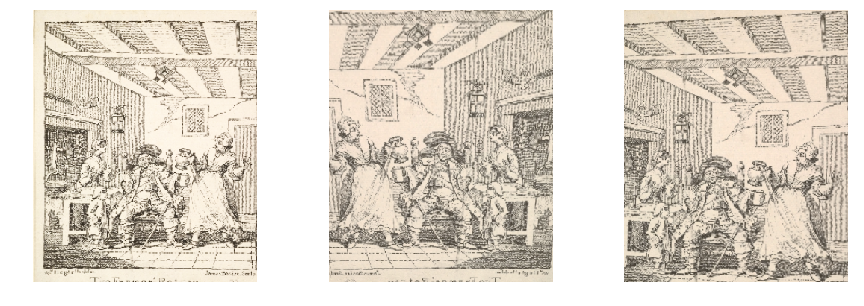

In [0]:
def get_img():
    return open_image(path/'train/868060948f7b1b6c.png')

def apply_trans_forms(rows=1, cols=3, width=15, height=5, **kwargs):
    img = get_img()
    [img.apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(rows,cols,
                                                                                          figsize=(width,height))[1].flatten())]
apply_trans_forms()

In [0]:
# Source: https://www.kaggle.com/c/human-protein-atlas-image-classification/discussion/78109
class FocalLoss(nn.Module):
    def __init__(self, gamma=2):
        super().__init__()
        self.gamma = gamma

    def forward(self, logit, target):
        target = target.float()
        max_val = (-logit).clamp(min=0)
        loss = logit - logit * target + max_val + \
               ((-max_val).exp() + (-logit - max_val).exp()).log()

        invprobs = F.logsigmoid(-logit * (target * 2.0 - 1.0))
        loss = (invprobs * self.gamma).exp() * loss
        if len(loss.size())==2:
            loss = loss.sum(dim=1)
        return loss.mean()

In [0]:
learn = cnn_learner(data, base_arch=se_resnext101_32x4d, loss_func=FocalLoss(), metrics=fbeta)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


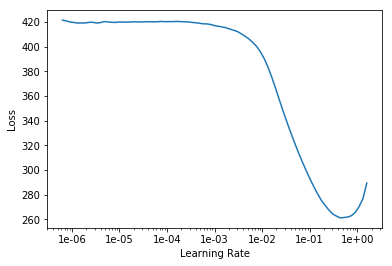

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
#learn.fit_one_cycle(15, slice(1e-5, 1e-2))
learn.fit_one_cycle(5, slice(1e-5, 1e-2))

epoch,train_loss,valid_loss,fbeta,time
0,3.845056,3.350734,0.363623,1:33:34
1,4.083382,295.975403,0.361285,1:33:34
2,3.692915,2230.278809,0.358655,1:33:34
3,3.353163,1068.408813,0.398019,1:33:37
4,3.186570,557.122559,0.414328,1:33:37


In [0]:
learn.save('stage-1', return_path=True)
learn.export()

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type FocalLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


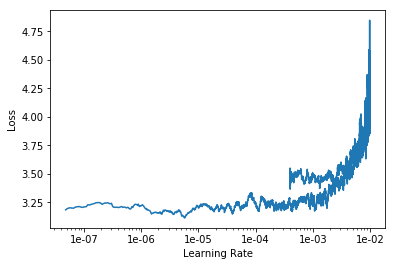

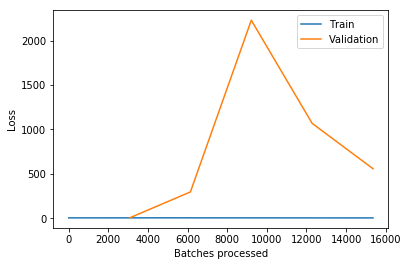

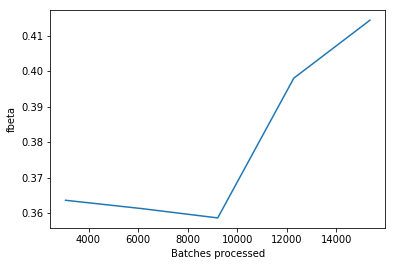

In [0]:
learn.recorder.plot()
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

In [0]:
def find_best_fixed_threshold(preds, targs, do_plot=True):
    score = []
    thrs = np.arange(0, 0.5, 0.01)
    for thr in progress_bar(thrs):
        score.append(fbeta(valid_preds[0],valid_preds[1], thresh=thr))
    score = np.array(score)
    pm = score.argmax()
    best_thr, best_score = thrs[pm], score[pm].item()
    print(f'thr={best_thr:.3f}', f'F2={best_score:.3f}')
    if do_plot:
        plt.plot(thrs, score)
        plt.vlines(x=best_thr, ymin=score.min(), ymax=score.max())
        plt.text(best_thr+0.03, best_score-0.01, f'$F_{2}=${best_score:.3f}', fontsize=14);
        plt.show()
    return best_thr

i2c = np.array([[i, c] for c, i in learn.data.train_ds.y.c2i.items()]).astype(int) # indices to class number correspondence

def join_preds(preds, thr):
    return [' '.join(i2c[np.where(t==1)[0],1].astype(str)) for t in (preds[0].sigmoid()>thr).long()]

thr=0.290 F2=0.486


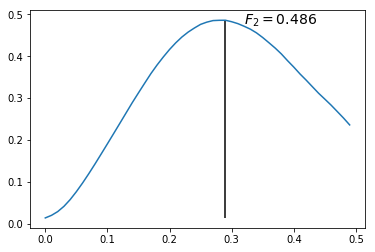

0.29


In [0]:
valid_preds = learn.TTA(ds_type=DatasetType.Valid)
best_thr = find_best_fixed_threshold(*valid_preds)
print(best_thr)

In [0]:
preds_t = np.stack(valid_preds)
np.save('val_preds.npy', preds_t)
print(preds_t.shape)

(2, 10923, 1103)


In [0]:
# Test predictions
test_preds = learn.TTA(ds_type=DatasetType.Test)

preds_t = test_preds[0].numpy()
np.save('test_preds.npy', preds_t)
print(preds_t.shape)

test_df.attribute_ids = join_preds(test_preds, best_thr)
test_df.head()

NameError: ignored

In [0]:
test_df.to_csv('submission.csv', index=False)